[*********************100%***********************]  1 of 1 completed


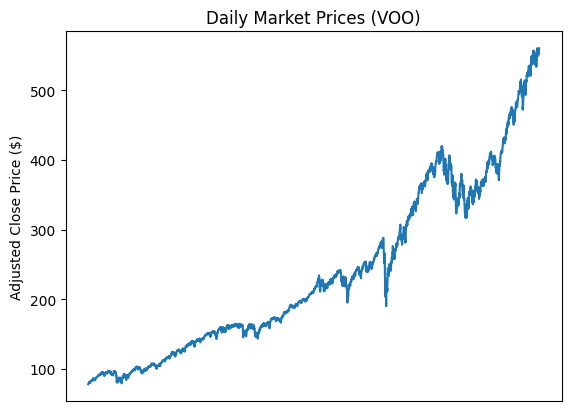

In [7]:
from lbm.datasets.voo import Preprocessor
from matplotlib import pyplot as plt

processor = Preprocessor()
train_loader, val_loader, test_loader = processor.get_loaders()

prices = processor.dataset.x
plt.plot(prices)
plt.title("Daily Market Prices (VOO)")
# turn off labels on x-axis
plt.ylabel("Adjusted Close Price ($)")
plt.xticks([])
plt.show()

In [14]:
from lbm.models import PriceForecaster
from torch.optim import Adam
from torch.nn import MSELoss
from lbm.workflow import train_and_validate
import numpy as np

def validate_model(epochs=50):
    model = PriceForecaster()
    optimizer = Adam(model.parameters())
    loss_fn = MSELoss()
    train_losses, val_losses = train_and_validate(model, train_loader, 
                                                  val_loader, optimizer, 
                                                  loss_fn, epochs=epochs)
    plt.plot(np.arange(1, len(train_losses) + 1), train_losses, 
             label='Training', color='blue')
    plt.plot(np.arange(1, len(val_losses) + 1), val_losses, label='Validation',
             color='orange')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()



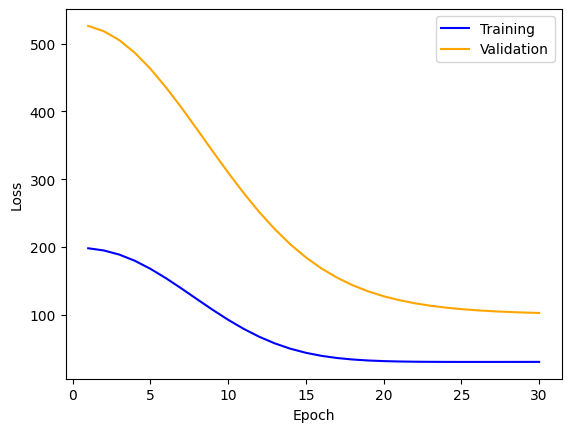

In [16]:
validate_model(epochs=30)